<a href="https://colab.research.google.com/github/Vas1l1sa/Bioinformatics-ML-petproject/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%BE%D0%B2_Bioinformatics_%2B_ML_petproject_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


ГИПОТЕЗА: У здоровых людей и людей с гастритом есть какие-то различия в микробиоте кишечника. Какие?

In [ ]:
#загрузим полученные ранее датасеты
df = pd.read_csv('/content/drive/MyDrive/данные для петпроджекта/df.csv')
df_healthy = pd.read_csv('/content/drive/MyDrive/данные для петпроджекта/df_healthy.csv')
df_total = pd.read_csv('/content/drive/MyDrive/данные для петпроджекта/df_total.csv')

###**1. Применим критерий Манна-Уитни ко всем колонкам и посмотрим, есть ли значимые различия между группами людей по каждой из колонок**

In [ ]:
from scipy.stats import mannwhitneyu

#применяем критерий Манна-Уитни ко всем колонкам (кроме метки группы)
results = {}
for column in df_total.columns:
    if column != 'Index':
        #данные для двух групп
        healthy_values = df_total[df_total['Index'] == 0][column]
        gastritis_values = df_total[df_total['Index'] == 1][column]

        #применяем критерий Манна-Уитни
        stat, p_value = mannwhitneyu(healthy_values, gastritis_values, alternative='two-sided')

        #сохраняем результат
        results[column] = {'U-statistic': stat, 'p-value': p_value}

#преобразуем результаты в DataFrame для удобства
results_df = pd.DataFrame(results).T
print(results_df)

                                                   U-statistic       p-value
Akkermansia_muciniphila                                 6860.0  5.933223e-11
Alistipes_finegoldii                                    9100.0  4.018215e-02
Alistipes_finegoldii/onderdonkii                        7140.0  9.113973e-10
Alistipes_inops                                         8610.0  5.591083e-04
Alistipes_massiliensis                                  9240.0  1.490201e-01
...                                                        ...           ...
Lactobacillus_fermentum/gasseri/reuteri/vaginalis       9310.0  3.101812e-01
Lactobacillus_phage/plantarum/reuteri/salivarius        9310.0  3.101812e-01
Roseburia_faecis                                        9240.0  1.490201e-01
Weissella_cibaria/confusa/koreensis/minor               9310.0  3.101812e-01
not_null_sum                                             182.0  7.059030e-45

[130 rows x 2 columns]


**Если p-value для колонки меньше 0.05, это указывает на статистически значимую разницу между группами людей для этой колонки**

In [ ]:
#найдем колонки, для которых p-value < 0.05
p_value_results = results_df[results_df['p-value'] < 0.05]
p_value_results

,U-statistic,p-value
Akkermansia_muciniphila,6860.0,5.933223e-11
Alistipes_finegoldii,9100.0,4.018215e-02
Alistipes_finegoldii/onderdonkii,7140.0,9.113973e-10
Alistipes_inops,8610.0,5.591083e-04
Alistipes_putredinis,6459.0,7.478501e-10
...,...,...
Ruminococcus_bromii,8610.0,5.591083e-04
Sutterella_wadsworthensis,8050.0,4.138531e-06
Fusobacterium_nucleatum,12236.0,1.389274e-11
Slackia_isoflavoniconvertens,9100.0,4.018215e-02


In [ ]:
#создаем датафрейм с теми колонками, которые были отобраны по критерию Манна-Уитни
p_value_columns_df = df_total[list(p_value_results.index)]
p_value_columns_df = p_value_columns_df.copy() #чтобы не вылетало предупреждение
p_value_columns_df['Index'] = df_total['Index']
p_value_columns_df = p_value_columns_df.groupby('Index').mean()
p_value_columns_df = p_value_columns_df.reset_index().sort_values('Index')
p_value_columns_df.rename(columns={0.0: 'Healthy', 1.0: 'Gastric'}, inplace=True)
p_value_columns_df

,Index,Akkermansia_muciniphila,Alistipes_finegoldii,Alistipes_finegoldii/onderdonkii,Alistipes_inops,Alistipes_putredinis,Alistipes_shahii,Bacteroides_caccae,Bacteroides_cellulosilyticus/intestinalis,Bacteroides_clarus,...,Phascolarctobacterium_succinatutens,Prevotella_copri,Roseburia_intestinalis,Roseburia_inulinivorans,Ruminococcus_bicirculans,Ruminococcus_bromii,Sutterella_wadsworthensis,Fusobacterium_nucleatum,Slackia_isoflavoniconvertens,not_null_sum
0,0.0,0.000000,0.000000,0.00000,0.000000,0.127353,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.227657,0.000000,1.643430
1,1.0,1.259742,0.044148,0.62652,0.153149,0.908970,0.049575,0.544545,0.668058,0.051755,...,0.088549,0.910322,0.160593,0.175007,0.113006,0.252531,0.321986,0.038228,0.040054,36.149447


In [ ]:
#представим то же самое более наглядно
differences = p_value_columns_df.T.drop(['Index', 'not_null_sum'])
differences.reset_index(inplace=True)
differences.rename(columns={0: 'Healthy', 1: 'Gastric', 'index': 'bacterium'}, inplace=True)
differences

,bacterium,Healthy,Gastric
0,Akkermansia_muciniphila,0.000000,1.259742
1,Alistipes_finegoldii,0.000000,0.044148
2,Alistipes_finegoldii/onderdonkii,0.000000,0.626520
3,Alistipes_inops,0.000000,0.153149
4,Alistipes_putredinis,0.127353,0.908970
5,Alistipes_shahii,0.000000,0.049575
6,Bacteroides_caccae,0.000000,0.544545
7,Bacteroides_cellulosilyticus/intestinalis,0.000000,0.668058
8,Bacteroides_clarus,0.000000,0.051755
9,Bacteroides_coprocola,0.000000,0.252097


**Посмотрим на виды бактерий, которые:**


**1.**   **Не встречаются у здоровых людей**

**2.**   **Не встречаются у больных гнастритом людей**

**3.**   **Встречаются и у здоровых, и у больных гастритом**


In [ ]:
#список видов бактерий, которые встретились только у людей с гастритом

only_gastric = differences[differences['Healthy'] == 0]['bacterium']
list_only_gastric = list(only_gastric)
list_only_gastric


['Akkermansia_muciniphila',
 'Alistipes_finegoldii',
 'Alistipes_finegoldii/onderdonkii',
 'Alistipes_inops',
 'Alistipes_shahii',
 'Bacteroides_caccae',
 'Bacteroides_cellulosilyticus/intestinalis',
 'Bacteroides_clarus',
 'Bacteroides_coprocola',
 'Bacteroides_dorei/fragilis',
 'Bacteroides_dorei/vulgatus',
 'Bacteroides_finegoldii',
 'Bacteroides_fragilis/koreensis/kribbi/ovatus',
 'Bacteroides_fragilis/ovatus',
 'Bacteroides_fragilis/xylanisolvens',
 'Bacteroides_massiliensis',
 'Bacteroides_ovatus/xylanisolvens',
 'Bacteroides_plebeius',
 'Bacteroides_stercoris',
 'Bacteroides_thetaiotaomicron/xylanisolvens',
 'Barnesiella_intestinihominis',
 'Bifidobacterium_adolescentis/faecale/ruminantium/stercoris',
 'Bifidobacterium_adolescentis/faecale/stercoris',
 'Bifidobacterium_catenulatum/kashiwanohense/pseudocatenulatum',
 'Bifidobacterium_longum',
 'Bilophila_wadsworthia',
 'Blautia_obeum/wexlerae',
 'Collinsella_aerofaciens',
 'Coprococcus_comes',
 'Dialister_invisus',
 'Dorea_longic

**Для наглядности представим этот список видов бактерий, встречающихся только у людей с гастритом, в виде таблицы**

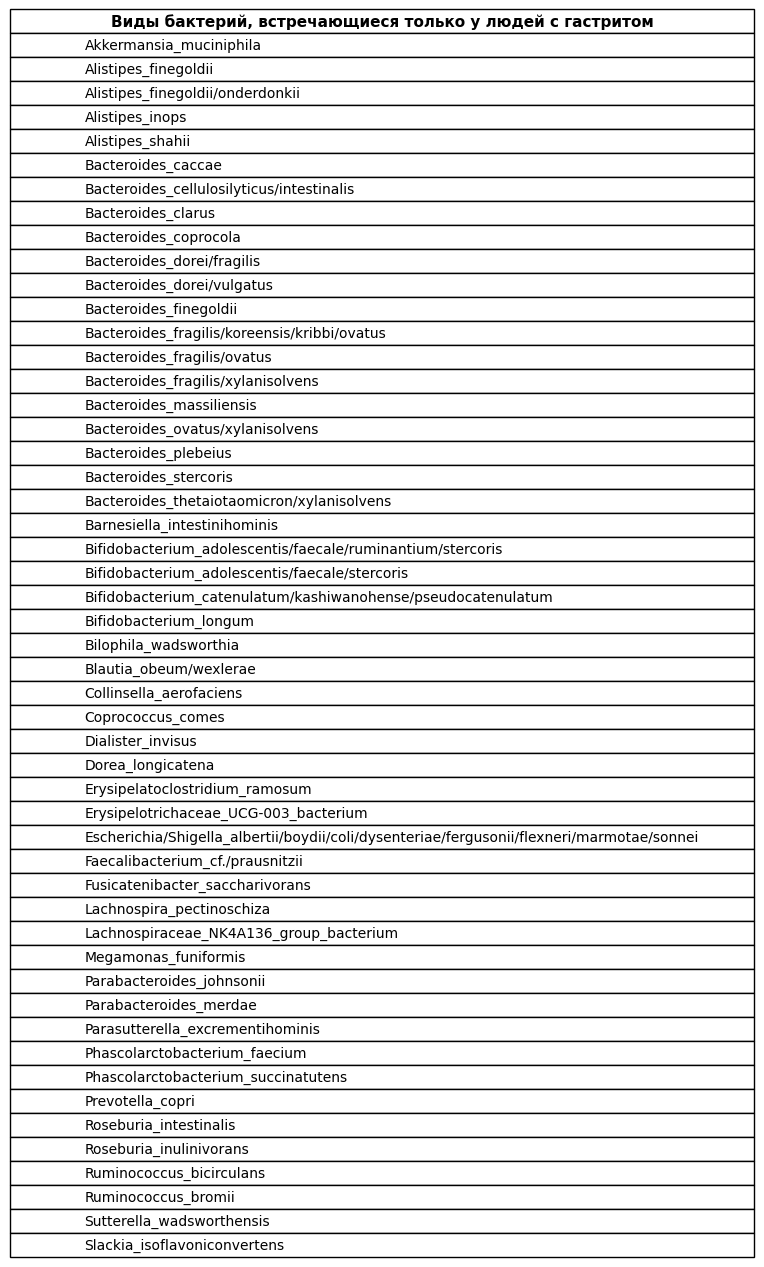

In [ ]:
#для наглядости представим list_only_gastric в виде таблицы

text_list = list_only_gastric
df = pd.DataFrame({'Виды бактерий, встречающиеся только у людей с гастритом': text_list})


fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')

table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='left',
    loc='center'
)


table.auto_set_font_size(False)
table.set_fontsize(10)
table[0, 0].set_text_props(fontsize=11, fontweight='bold')

#настройка ширины столбца и отступов
table.scale(1.2, 1.2)


#настройка ширины столбца для уменьшения отступа
table.scale(1, 1.2)

plt.show()


Виды бактерий из списка only_gastric - это **виды-маркеры**, которые можно определять методом ПЦР в образцах (ПЦР чувствителен даже к очень низким концентрациям генетического материала этих бактерий в образцах).

Таким образом, по наличию хотя бы каких-то видов бактерий в образцах можно будет выдвинуть предположение о том, что у человека с такими результатами анализа есть довольно высокая вероятность гастрита.

Важно! Такие результаты не значат, что человек точно болен гастритом, т.к. состав микробиоты человека очень сильно зависит от региона проживания человека, питания, экологических условий и т.п. Положительные результаты по этим видам могут означать, что у этого человека с большей вероятностью может быть обнаружен гастрит, чем у человека, в чьих образцах этих бактрерий обрнаружено не было.

In [ ]:
#список видов бактерий, которые встретились только у здоровых людей

only_healthy = differences[differences['Gastric'] == 0]['bacterium']
list_only_healthy = list(only_healthy)
list_only_healthy

Таких видов бактерий не обнаружено

In [ ]:
#список видов бактерий, которые встретились и у здоровых людей, и у людей с гастритом

both_not_0 = differences[(differences['Gastric'] != 0) & (differences['Healthy'] != 0)]
bacterium_both_not_0 = both_not_0['bacterium']
list_bacterium_both_not_0 = list(bacterium_both_not_0)
list_bacterium_both_not_0

['Alistipes_putredinis',
 'Bacteroides_fragilis',
 'Bacteroides_uniformis',
 'Bacteroides_vulgatus',
 'Desulfovibrio_piger',
 'Faecalibacterium_prausnitzii',
 'Lactobacillus_ruminis',
 'Parabacteroides_distasonis',
 'Fusobacterium_nucleatum']

In [ ]:
#то же самое в виде датафрейма
both_not_0

,bacterium,Healthy,Gastric
4,Alistipes_putredinis,0.127353,0.908970
13,Bacteroides_fragilis,0.026487,0.426460
22,Bacteroides_uniformis,0.358212,2.097134
23,Bacteroides_vulgatus,0.390796,4.387435
33,Desulfovibrio_piger,0.070334,0.008970
40,Faecalibacterium_prausnitzii,0.095147,4.884867
44,Lactobacillus_ruminis,0.060664,0.018708
46,Parabacteroides_distasonis,0.052817,0.328700
58,Fusobacterium_nucleatum,0.227657,0.038228


**Построим гарфик для наглядного предстваления этих данных**

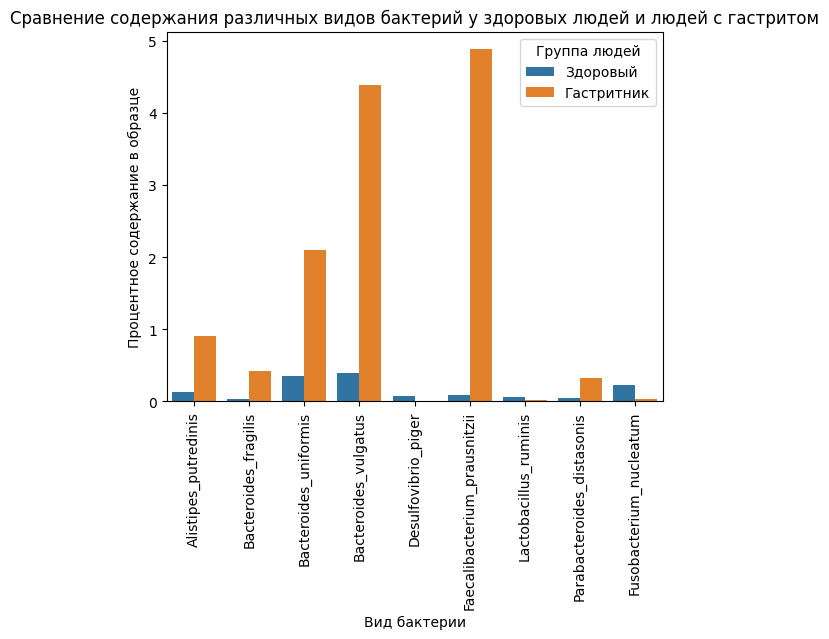

In [ ]:
#виды бактерий, которые встретились и у здоровых людей, и у людей с гастритом
data = {
    'Вид бактерии': [
        'Alistipes_putredinis', 'Alistipes_putredinis',
        'Bacteroides_fragilis', 'Bacteroides_fragilis',
        'Bacteroides_uniformis', 'Bacteroides_uniformis',
        'Bacteroides_vulgatus', 'Bacteroides_vulgatus',
        'Desulfovibrio_piger', 'Desulfovibrio_piger',
        'Faecalibacterium_prausnitzii', 'Faecalibacterium_prausnitzii',
        'Lactobacillus_ruminis', 'Lactobacillus_ruminis',
        'Parabacteroides_distasonis', 'Parabacteroides_distasonis',
        'Fusobacterium_nucleatum', 'Fusobacterium_nucleatum'
    ],
    'Группа людей': [
        'Здоровый', 'Гастритник', 'Здоровый', 'Гастритник', 'Здоровый', 'Гастритник',
        'Здоровый', 'Гастритник', 'Здоровый', 'Гастритник', 'Здоровый', 'Гастритник',
        'Здоровый', 'Гастритник', 'Здоровый', 'Гастритник', 'Здоровый', 'Гастритник'
    ],
    'Процентное содержание в образце': [
        0.127353, 0.908970, 0.026487, 0.426460, 0.358212, 2.097134,
        0.390796, 4.387435, 0.070334, 0.008970, 0.095147, 4.884867,
        0.060664, 0.018708, 0.052817, 0.328700, 0.227657, 0.038228
    ]
}

df = pd.DataFrame(data)

#построение графика
sns.barplot(x='Вид бактерии', y='Процентное содержание в образце', hue='Группа людей', data=df)
plt.title('Сравнение содержания различных видов бактерий у здоровых людей и людей с гастритом')
plt.xticks(rotation=90)
plt.show()
